# Nuclear Technology Stock Portfolio Risk and Returns 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Nuclear Technology Stock
title = 'Nuclear Technology'
symbols = ['BE','CCJ','HYSR','OPTT', 'RUN', 'UEC', 'UUUU']
start = '2012-01-01'
end = '2021-11-05'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
9 years


In [5]:
number_of_years = delta.years

In [6]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

118

In [7]:
days = (df.index[-1] - df.index[0]).days
days

1198

In [8]:
df.head()

,BE,CCJ,HYSR,OPTT,RUN,UEC,UUUU
Date,,,,,,,
2018-07-25,25.000000,10.731727,0.009,15.0,15.11,1.53,2.50
2018-07-26,21.010000,11.095346,0.009,15.0,15.23,1.66,2.77
2018-07-27,22.600000,10.643278,0.009,15.0,14.61,1.65,2.74
2018-07-30,23.850000,10.456553,0.009,13.8,13.85,1.62,2.91
2018-07-31,23.049999,10.613795,0.009,14.8,14.14,1.65,2.95


In [9]:
df.tail()

,BE,CCJ,HYSR,OPTT,RUN,UEC,UUUU
Date,,,,,,,
2021-10-29,31.260000,24.299999,0.041,2.13,57.680000,3.72,7.84
2021-11-01,32.349998,25.139999,0.049,2.25,58.189999,3.89,8.41
2021-11-02,32.139999,25.070000,0.054,2.23,57.720001,4.00,8.55
2021-11-03,31.969999,27.190001,0.075,2.21,58.310001,4.38,9.77
2021-11-04,30.160000,27.150000,0.071,2.18,57.750000,4.57,10.16


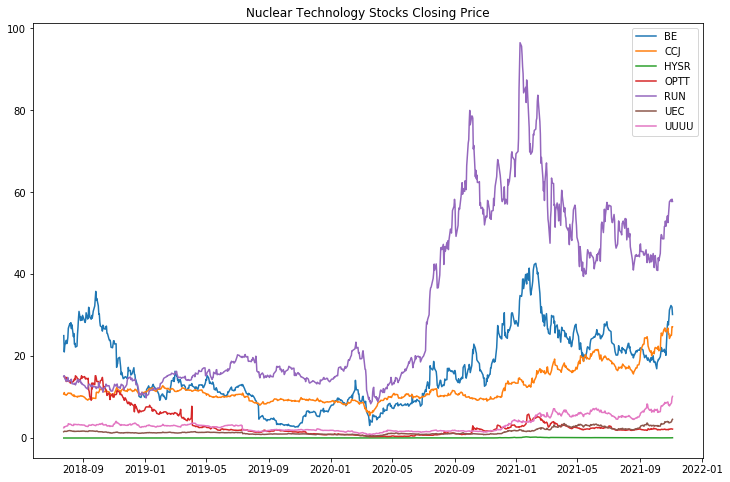

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

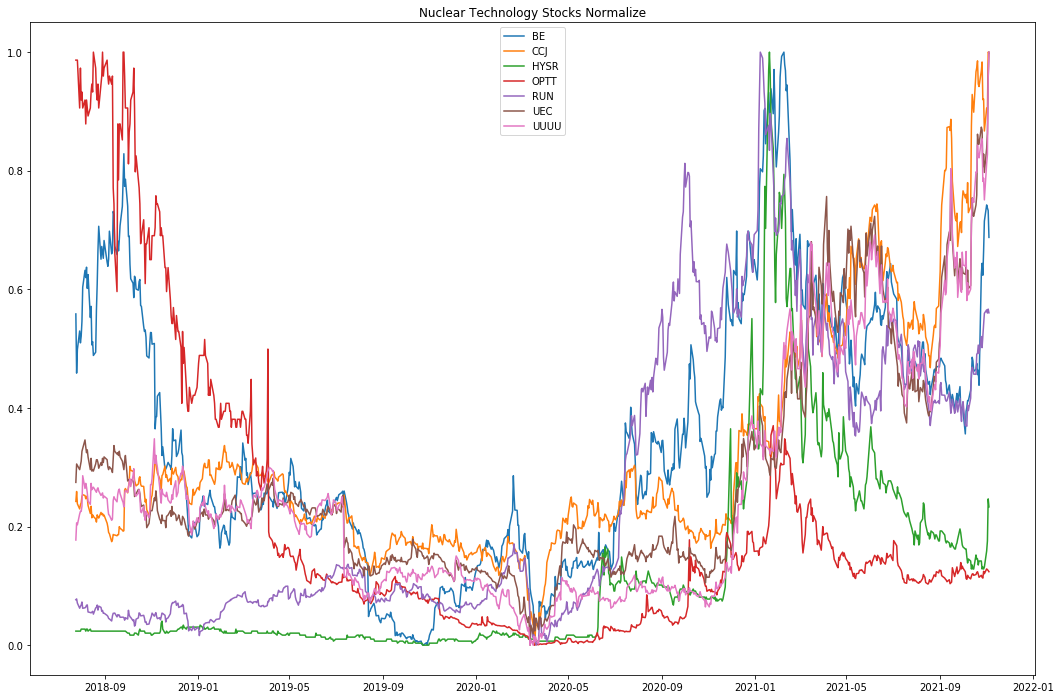

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

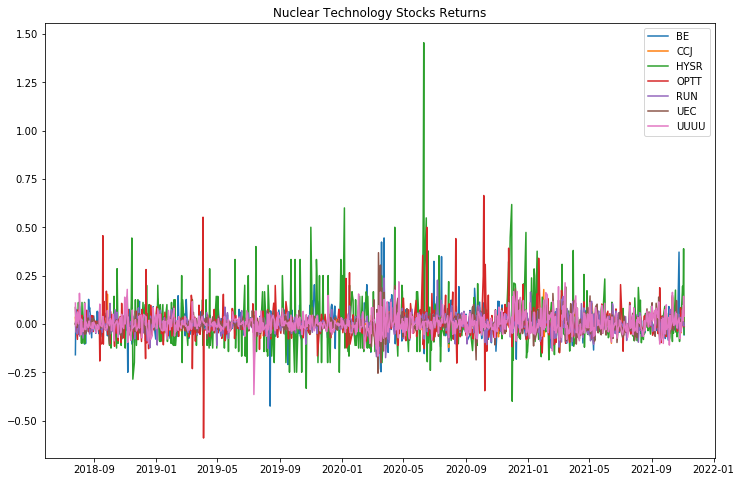

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title +' Stocks Returns')
plt.legend(labels=stock_rets.columns)

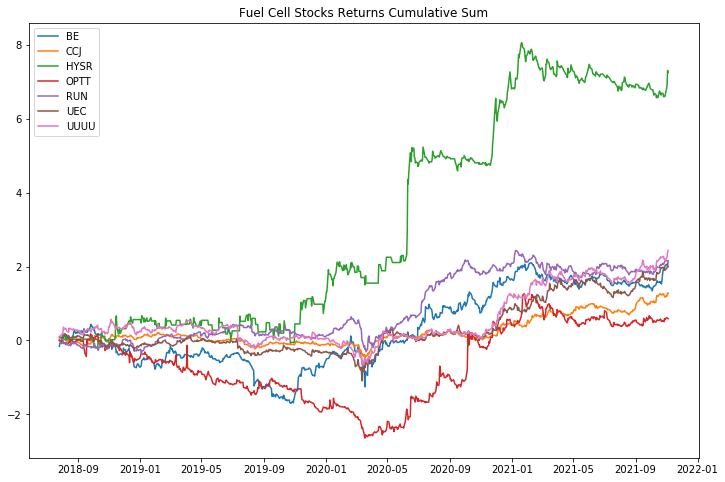

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Fuel Cell Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

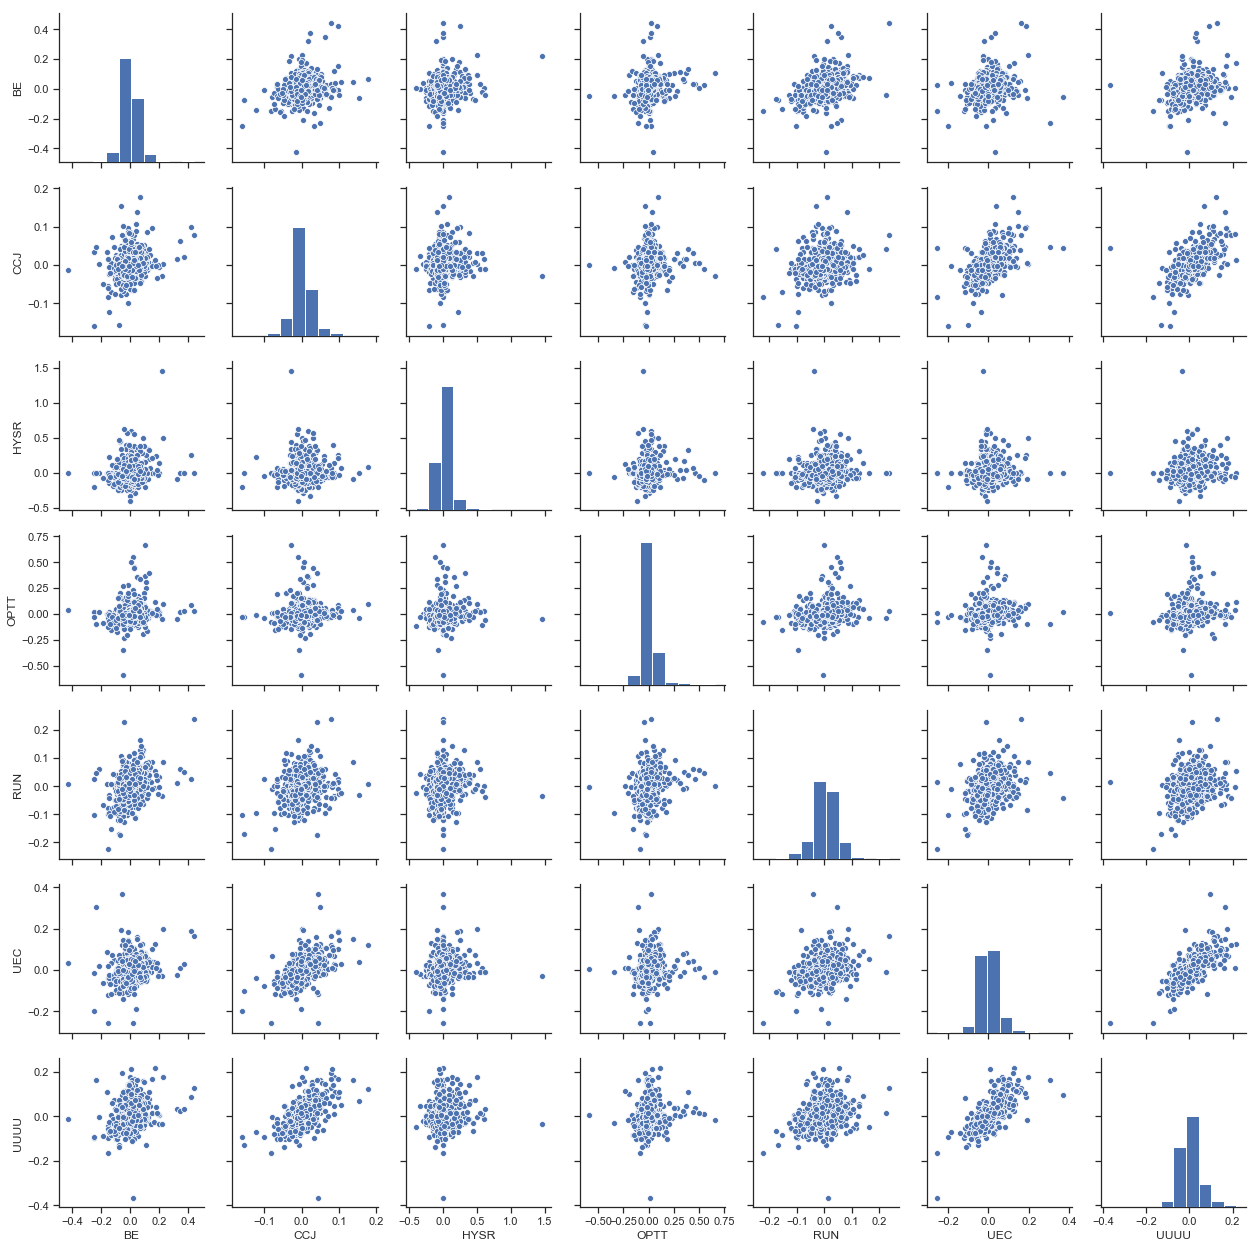

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

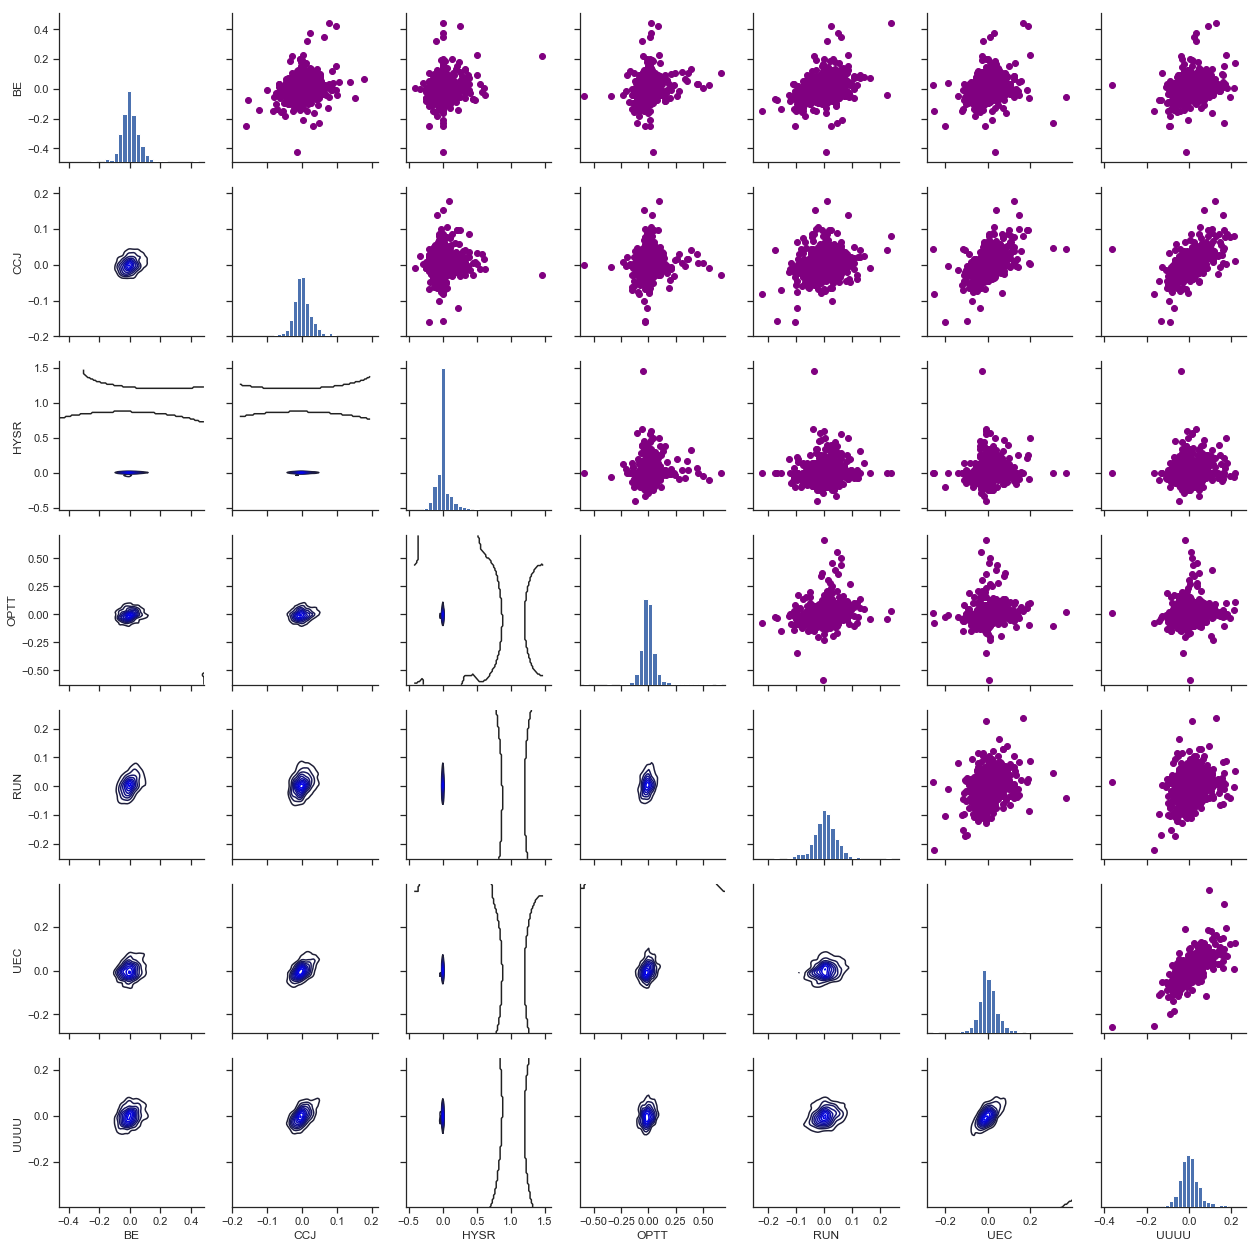

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

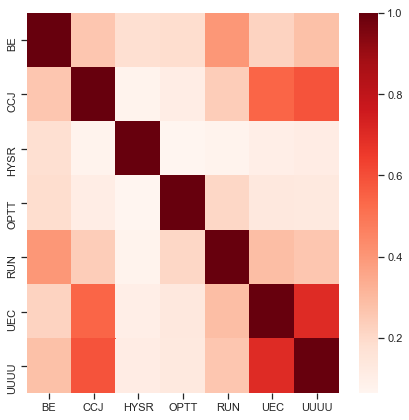

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

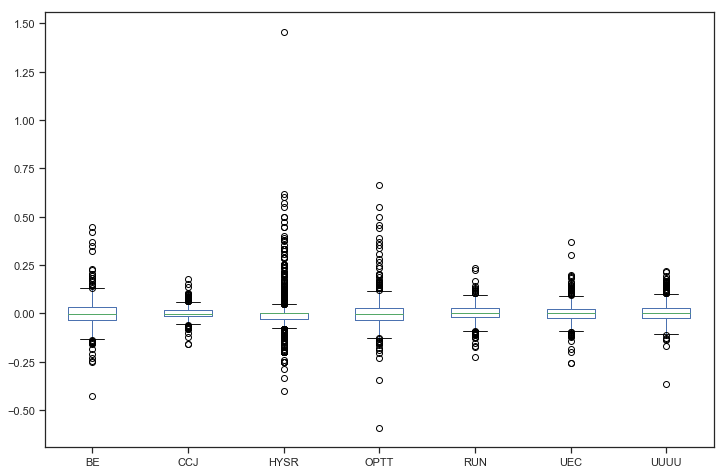

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

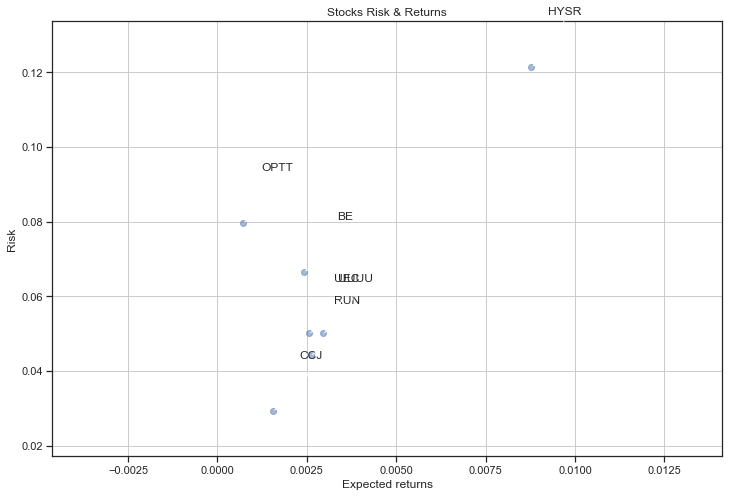

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

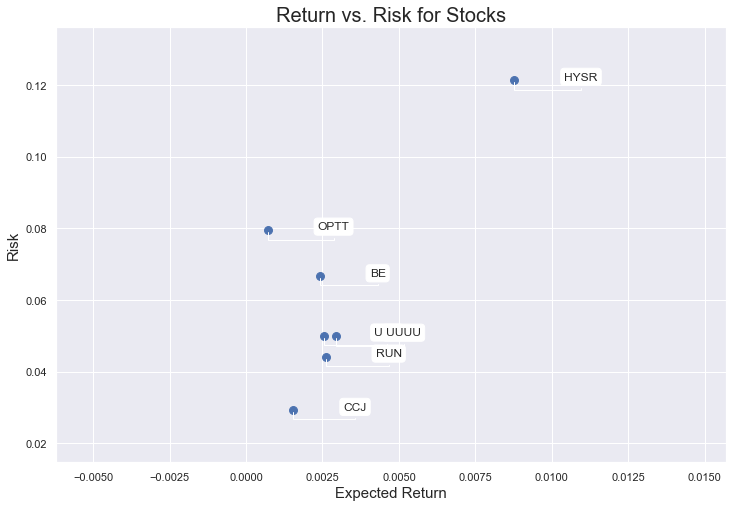

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

UUUU  UUUU    1.000000
UEC   UEC     1.000000
CCJ   CCJ     1.000000
HYSR  HYSR    1.000000
RUN   RUN     1.000000
OPTT  OPTT    1.000000
BE    BE      1.000000
UEC   UUUU    0.703004
UUUU  UEC     0.703004
      CCJ     0.589651
CCJ   UUUU    0.589651
UEC   CCJ     0.545542
CCJ   UEC     0.545542
RUN   BE      0.402736
BE    RUN     0.402736
UEC   RUN     0.287773
RUN   UEC     0.287773
BE    UUUU    0.282060
UUUU  BE      0.282060
RUN   UUUU    0.264754
UUUU  RUN     0.264754
BE    CCJ     0.263208
CCJ   BE      0.263208
RUN   CCJ     0.242988
CCJ   RUN     0.242988
BE    UEC     0.222355
UEC   BE      0.222355
OPTT  RUN     0.213475
RUN   OPTT    0.213475
BE    OPTT    0.188489
OPTT  BE      0.188489
HYSR  BE      0.184267
BE    HYSR    0.184267
OPTT  UEC     0.136751
UEC   OPTT    0.136751
UUUU  OPTT    0.129848
OPTT  UUUU    0.129848
UUUU  HYSR    0.114640
HYSR  UUUU    0.114640
CCJ   OPTT    0.110331
OPTT  CCJ     0.110331
UEC   HYSR    0.101284
HYSR  UEC     0.101284
CCJ   HYSR 

In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,BE,CCJ,HYSR,OPTT,RUN,UEC,UUUU
Date,,,,,,,
2018-07-26,0.305152,0.574106,0.215686,0.470536,0.502768,0.546739,0.811435
2018-07-27,0.575671,0.353477,0.215686,0.470536,0.397274,0.401238,0.607637
2018-07-30,0.552252,0.422066,0.215686,0.406756,0.372749,0.381797,0.732618
2018-07-31,0.450090,0.518392,0.215686,0.528307,0.530951,0.440483,0.649786
2018-08-01,0.511104,0.493096,0.275599,0.427442,0.513151,0.439945,0.626211


In [24]:
Normalized_Value.corr()

,BE,CCJ,HYSR,OPTT,RUN,UEC,UUUU
BE,1.000000,0.263208,0.184267,0.188489,0.402736,0.222355,0.282060
CCJ,0.263208,1.000000,0.076274,0.110331,0.242988,0.545542,0.589651
HYSR,0.184267,0.076274,1.000000,0.063948,0.075998,0.101284,0.114640
OPTT,0.188489,0.110331,0.063948,1.000000,0.213475,0.136751,0.129848
RUN,0.402736,0.242988,0.075998,0.213475,1.000000,0.287773,0.264754
UEC,0.222355,0.545542,0.101284,0.136751,0.287773,1.000000,0.703004
UUUU,0.282060,0.589651,0.114640,0.129848,0.264754,0.703004,1.000000


In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

UUUU  UUUU    1.000000
UEC   UEC     1.000000
CCJ   CCJ     1.000000
HYSR  HYSR    1.000000
RUN   RUN     1.000000
OPTT  OPTT    1.000000
BE    BE      1.000000
UEC   UUUU    0.703004
UUUU  UEC     0.703004
      CCJ     0.589651
CCJ   UUUU    0.589651
UEC   CCJ     0.545542
CCJ   UEC     0.545542
RUN   BE      0.402736
BE    RUN     0.402736
UEC   RUN     0.287773
RUN   UEC     0.287773
BE    UUUU    0.282060
UUUU  BE      0.282060
RUN   UUUU    0.264754
UUUU  RUN     0.264754
BE    CCJ     0.263208
CCJ   BE      0.263208
RUN   CCJ     0.242988
CCJ   RUN     0.242988
BE    UEC     0.222355
UEC   BE      0.222355
OPTT  RUN     0.213475
RUN   OPTT    0.213475
BE    OPTT    0.188489
OPTT  BE      0.188489
HYSR  BE      0.184267
BE    HYSR    0.184267
OPTT  UEC     0.136751
UEC   OPTT    0.136751
UUUU  OPTT    0.129848
OPTT  UUUU    0.129848
UUUU  HYSR    0.114640
HYSR  UUUU    0.114640
CCJ   OPTT    0.110331
OPTT  CCJ     0.110331
UEC   HYSR    0.101284
HYSR  UEC     0.101284
CCJ   HYSR 

In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
BE      0.002408
CCJ     0.001550
HYSR    0.008773
OPTT    0.000709
RUN     0.002603
UEC     0.002557
UUUU    0.002945
dtype: float64
--------------------------------------------------
Stock risks:
BE      0.066612
CCJ     0.029332
HYSR    0.121457
OPTT    0.079646
RUN     0.044209
UEC     0.050088
UUUU    0.050034
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
OPTT,0.000709,0.079646
CCJ,0.001550,0.029332
BE,0.002408,0.066612
UEC,0.002557,0.050088
RUN,0.002603,0.044209
UUUU,0.002945,0.050034
HYSR,0.008773,0.121457


In [28]:
table.sort_values(by='Risk')

,Returns,Risk
CCJ,0.001550,0.029332
RUN,0.002603,0.044209
UUUU,0.002945,0.050034
UEC,0.002557,0.050088
BE,0.002408,0.066612
OPTT,0.000709,0.079646
HYSR,0.008773,0.121457


In [29]:
rf = 0.001
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
BE,0.002408,0.066612,0.021142
CCJ,0.001550,0.029332,0.018749
HYSR,0.008773,0.121457,0.063995
OPTT,0.000709,0.079646,-0.003652
RUN,0.002603,0.044209,0.036252
UEC,0.002557,0.050088,0.031087
UUUU,0.002945,0.050034,0.038872


In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
BE,0.002408,0.066612,0.021142,0.444730,-0.425000,-0.002288,-5.661556
CCJ,0.001550,0.029332,0.018749,0.177939,-0.160305,-0.000919,-0.147116
HYSR,0.008773,0.121457,0.063995,1.454546,-0.400000,0.000000,-5.333334
OPTT,0.000709,0.079646,-0.003652,0.664122,-0.590206,-0.005263,-1.357465
RUN,0.002603,0.044209,0.036252,0.237250,-0.223920,0.003056,-0.960386
UEC,0.002557,0.050088,0.031087,0.368421,-0.256944,0.000000,4.337901
UUUU,0.002945,0.050034,0.038872,0.217949,-0.365132,0.000000,3.991805


In [34]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
BE,0.002408,0.066612,0.021142,0.444730,-0.425000,-0.002288,-5.661556,-0.000049
CCJ,0.001550,0.029332,0.018749,0.177939,-0.160305,-0.000919,-0.147116,-0.000001
HYSR,0.008773,0.121457,0.063995,1.454546,-0.400000,0.000000,-5.333334,-0.000046
OPTT,0.000709,0.079646,-0.003652,0.664122,-0.590206,-0.005263,-1.357465,-0.000011
RUN,0.002603,0.044209,0.036252,0.237250,-0.223920,0.003056,-0.960386,-0.000008
UEC,0.002557,0.050088,0.031087,0.368421,-0.256944,0.000000,4.337901,0.000035
UUUU,0.002945,0.050034,0.038872,0.217949,-0.365132,0.000000,3.991805,0.000033


In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BE,0.002408,0.066612,0.021142,0.444730,-0.425000,-0.002288,-5.661556,-0.000049,0.040260
CCJ,0.001550,0.029332,0.018749,0.177939,-0.160305,-0.000919,-0.147116,-0.000001,0.215605
HYSR,0.008773,0.121457,0.063995,1.454546,-0.400000,0.000000,-5.333334,-0.000046,0.544144
OPTT,0.000709,0.079646,-0.003652,0.664122,-0.590206,-0.005263,-1.357465,-0.000011,-0.333496
RUN,0.002603,0.044209,0.036252,0.237250,-0.223920,0.003056,-0.960386,-0.000008,0.325820
UEC,0.002557,0.050088,0.031087,0.368421,-0.256944,0.000000,4.337901,0.000035,0.258821
UUUU,0.002945,0.050034,0.038872,0.217949,-0.365132,0.000000,3.991805,0.000033,0.343055


In [36]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BE,0.002408,0.066612,0.021142,0.444730,-0.425000,-0.002288,-5.661556,-0.000049,0.040260
HYSR,0.008773,0.121457,0.063995,1.454546,-0.400000,0.000000,-5.333334,-0.000046,0.544144
OPTT,0.000709,0.079646,-0.003652,0.664122,-0.590206,-0.005263,-1.357465,-0.000011,-0.333496
RUN,0.002603,0.044209,0.036252,0.237250,-0.223920,0.003056,-0.960386,-0.000008,0.325820
CCJ,0.001550,0.029332,0.018749,0.177939,-0.160305,-0.000919,-0.147116,-0.000001,0.215605
UUUU,0.002945,0.050034,0.038872,0.217949,-0.365132,0.000000,3.991805,0.000033,0.343055
UEC,0.002557,0.050088,0.031087,0.368421,-0.256944,0.000000,4.337901,0.000035,0.258821


In [37]:
table['var_99'] = round((rets).quantile(0.01), 3)
table['var_95'] = round((rets).quantile(0.05), 3)

In [38]:
table.sort_values(by='Returns')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95
OPTT,0.000709,0.079646,-0.003652,0.664122,-0.590206,-0.005263,-1.357465,-0.000011,-0.333496,-0.150,-0.089
CCJ,0.001550,0.029332,0.018749,0.177939,-0.160305,-0.000919,-0.147116,-0.000001,0.215605,-0.070,-0.037
BE,0.002408,0.066612,0.021142,0.444730,-0.425000,-0.002288,-5.661556,-0.000049,0.040260,-0.150,-0.084
UEC,0.002557,0.050088,0.031087,0.368421,-0.256944,0.000000,4.337901,0.000035,0.258821,-0.113,-0.065
RUN,0.002603,0.044209,0.036252,0.237250,-0.223920,0.003056,-0.960386,-0.000008,0.325820,-0.109,-0.074
UUUU,0.002945,0.050034,0.038872,0.217949,-0.365132,0.000000,3.991805,0.000033,0.343055,-0.101,-0.067
HYSR,0.008773,0.121457,0.063995,1.454546,-0.400000,0.000000,-5.333334,-0.000046,0.544144,-0.230,-0.143


In [39]:
# Pure Profit Score
df = df.dropna()
t = np.arange(0, df.shape[0]).reshape(-1, 1)
regression = LinearRegression().fit(t, df)
r_squared = regression.score(t, df)
table['PPS'] = table['CAGR'] * r_squared

In [40]:
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95,PPS
BE,0.002408,0.066612,0.021142,0.444730,-0.425000,-0.002288,-5.661556,-0.000049,0.040260,-0.150,-0.084,0.014394
CCJ,0.001550,0.029332,0.018749,0.177939,-0.160305,-0.000919,-0.147116,-0.000001,0.215605,-0.070,-0.037,0.077087
HYSR,0.008773,0.121457,0.063995,1.454546,-0.400000,0.000000,-5.333334,-0.000046,0.544144,-0.230,-0.143,0.194552
OPTT,0.000709,0.079646,-0.003652,0.664122,-0.590206,-0.005263,-1.357465,-0.000011,-0.333496,-0.150,-0.089,-0.119237
RUN,0.002603,0.044209,0.036252,0.237250,-0.223920,0.003056,-0.960386,-0.000008,0.325820,-0.109,-0.074,0.116493
UEC,0.002557,0.050088,0.031087,0.368421,-0.256944,0.000000,4.337901,0.000035,0.258821,-0.113,-0.065,0.092538
UUUU,0.002945,0.050034,0.038872,0.217949,-0.365132,0.000000,3.991805,0.000033,0.343055,-0.101,-0.067,0.122655
